# KNN Assignment

We are finally ready to make our first machine learning model.  In this assignment, you are going to code up the KNN model and then use your knn model to make predictions on real world data.


## Part 1 - EDA

#### 1. Get the data

Read the `seed_dataset.csv` file into a dataframe.  

Inspect the dataset.  This real dataset represents the results of x-rays into three different types of wheat kernels.  The first 7 columns are the attributes that the x-ray measured.  The `wheat_type`  represents the type of wheat kernel:

1. Kama
2. Rosa
3. Canadian

This is your target.  If you can successfully build a machine learning model that can classify these three types of wheat from the 7 attributes, you could make _billions_.  So let's get to it.

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from knn import euclidean_distance, KNNClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [166]:
df = pd.read_csv("../data/seeds_dataset_random.csv")
#df = df.iloc[:,1:]
#from sklearn.utils import shuffle
#df = shuffle(df)

In [167]:
#df.to_csv("../data/seeds_dataset_random.csv")

#### 2. Create data frames

Make a data frame called X that has only the `compactness` and `groove_length` columns.  These are the features you'll use to try to make a prediction.  We're going to start with just these two features, then we'll add more.

Make a dataframe called y that has only the column 'wheat_type'.  This is our target.

From these 2 DataFrames, create 4 __numpy arrays__:

1. X_train:  The first 170 rows of X
2. y_train: The first 170 rows of y
3. X_test: The remaining 40 rows of X
4. y_test: The remaining 40 rows of y

We're going to use X_train and y_train to build the model.  And we'll use X_test and y_test to evaluate our model.
We'll get way more into why we are doing this is future lectures.

(Note: the fact that X is capitalized and y is not is not a mistake. The convention is that because X is a matrix and y is a vector.)



In [168]:
y = df["wheat_type"]
X = df.loc[:,["compactness", "groove_length"]]  

X_train = np.array(X.loc[:170])
X_test = np.array(X.loc[170:])
y_train = np.array(y.loc[:170])
y_test = np.array(y.loc[170:])


#### 3. Visualize the data.

On this lecture we're not going to have you spend too much time wrestling with matplotlib.  Here's a function to visualize the data.  Call this function and pass in an axes and your X and y.  For now, pass in None for classifier, X_test and y_test.  


In [169]:
def plot_predictions(ax, X_train, y_train, classifier = None, X_test=None, y_test=None): 
    """Plot the decision boundary of a kNN classifier.

    Plots predictions as colors.

    Assumes classifier, has a .predict() method that follows the
    sci-kit learn functionality.

    X_train and X_test must contain only 2 continuous features.

    Function modeled on scikit-learn example.

    Colors have been chosen for accessibility.


    Parameters
    ----------
    ax: a pyplot axis.  Call fig,ax = plt.subplots() and then pass in the axis to this function
    X_train: numpy array, shape = [n_observations, n_features]
        Training data to display.
    y_train: numpy array, shape = [n_observations,]
        Target labels.)
    X_test: optional
    classifier: optional instance of classifier object A fitted classifier with a .predict() method
    
    """
    mesh_count = 100.
    buffer = 0.05

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].

    feature_1 = X_train[:, 0]
    feature_2 = X_train[:, 1]
    x_min, x_max = feature_1.min(), feature_1.max()
    y_min, y_max = feature_2.min(), feature_2.max()
    v_min, v_max = y_train.min(), y_train.max()

    x_mesh_step_size = (x_max - x_min)/mesh_count
    y_mesh_step_size = (y_max - y_min)/mesh_count

    x_dist = x_max - x_min
    y_dist = y_max - y_min
    xx, yy = np.meshgrid(np.arange(x_min - x_dist * buffer , x_max  + x_dist * buffer, x_mesh_step_size),
                         np.arange(y_min - y_dist * buffer,  y_max + y_dist * buffer, y_mesh_step_size))
    
    if (classifier):
        values = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        values = values.reshape(xx.shape)
        ax.pcolormesh(xx, yy,
                  values,
                  cmap='Set3',
                  vmin=v_min,
                  vmax=v_max)
    
    colors = ["#0099FF", "#99FF00", "#FFFF00"]
    labels = ["Kama", "Rosa", "Canadian"]
    if (X_test!=y_test):
        for i in range(1,4):
            sctr = ax.scatter(X_test[:,0][y_test==i], X_test[:,1][y_test==i],
                          c=colors[i-1],
                          label=labels[i-1],
                          edgecolor='black', lw=0.4)
    else:
    
        # Plot the training points, saving the colormap
        for i in range(1,4):
            sctr = ax.scatter(feature_1[y_train==i], feature_2[y_train==i],
                          c=colors[i-1],
                          cmap='Set1',
                          edgecolor='black', lw=0.4, label=labels[i-1])
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('compactness')
    ax.set_ylabel('groove length')
    #fig.colorbar()
    ax.legend()
    if (classifier):
        ax.set_title("Regression predictions (k = {0}, metric = '{1}')"
                         .format(classifier.k, classifier.distance.__name__))
    else:
        ax.set_title ("Wheat Types")

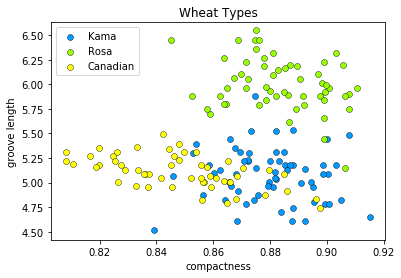

In [170]:
fig, ax = plt.subplots()
plot_predictions(ax, X_train, y_train)

#### 4. Have a look at what you've just plotted.  If you were asked for a quick "rule of thumb" for classifying wheat type based only on compactness and kernel length, what would you say?

## Part 2 - Build the model

#### 5. Let's get some machine learning going.  

We've given you a stub for the KNNClassifier class in the knn.py which you'll need to edit and then import into your notebook.  You'll need to fill in a few of the functions before we can apply it to our data set.   

First, implement the `euclidean distance` function in the knn.py file which returns the euclidean distance between two vectors.  


#### 6. Now implement the 'fit' function of the KNNClassifier class. 

Remember, in KNN, fit just stores the data.  This will probably be the easiest function you will write in this entire class.

```




#### 7. Next, implement the `predict` function.

This function will implement this pseudocode:

```
kNN:
    for every point in the dataset:
        calculate the distance between the point and x
        take the k points with the smallest distances to x 
        find the most common value of y amongst the those k points. 
        if more there is more than one most common value for y, randomly select one of them.
        return this value as our prediction
```

You may find the argsort() function useful here.  Here's an example of what it does:
```
a = np.array([40, 50, 20, 10, 70, 60, 30])  
print("If a were to be sorted, it would use the following *indices* in order:",  x.argsort())
b = np.array(['a', 'b', 'c', 'd', 'e', 'f','g'])
print("Here's b sorted in order of a:", y[x.argsort()])
```

Give this a run and make sure you understand what's going on with it.  



In [171]:
a = np.array([40, 50, 20, 10, 70, 60, 30])  
b = np.array(['a', 'b', 'c', 'd', 'e', 'f','g'])

print("If a were to be sorted, it would use the following *indices* in order:")
print(a.argsort())
print("Here's b sorted in order of a:")
print(b[a.argsort()])

If a were to be sorted, it would use the following *indices* in order:
[3 2 6 0 1 5 4]
Here's b sorted in order of a:
['d' 'c' 'g' 'a' 'b' 'f' 'e']


#### 8. Now,  test your classifier.  

Create a new KNNClassifer class and then fit it on X_train and y_train.  Now call the plot_predictions function again but this time pass your classifer into as the classifier parameter.  The background colors represent the prediction areas for your model.  Does it look kinda weird?  What do you think the problem is?

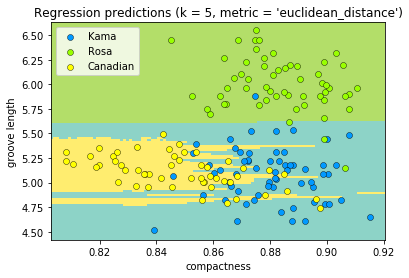

In [172]:
from knn import KNNClassifier

classifier = KNNClassifier()
classifier.fit(np.array(X_train), np.array(y_train))
fig, ax = plt.subplots()
plot_predictions(ax, X_train, y_train, classifier)

#### 9. Hmm, looks kinda weird.  What's going on here?   

The answer lies in the fact that the scale of the y-axis is on different magnitude than the scale of the x-axis.  So, the problem is that the groove_length is "bullying" the compactness and that's what's giving those weird horizontal lines in your prediction regions. 

Use the StandardScaler class from sklearn and call `fit_transform` on your X_train and 

``` 
scaler = StandardScaler()
X_train = fit_transform(X_train)
X_test = transform(X_test)
```


Then try calling plot_predictions again.

In [173]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

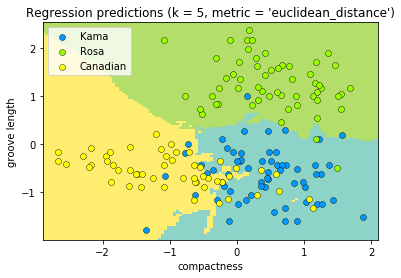

In [174]:

classifier = KNNClassifier()
classifier.fit(X_train, y_train)
fig, ax = plt.subplots()
plot_predictions(ax, X_train, y_train, classifier)

#### 10.  Try a small k

OK, that looks better.  Visually, take a look at how many incorrect predictions you have.   Now, try setting k=1 in your KNNClassifier class and calling plot again.  How many incorrect values now?  Do you think we should keep k=1?

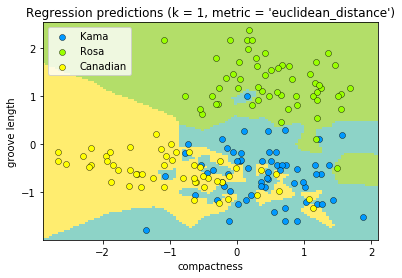

In [175]:
classifier = KNNClassifier(k=1)
classifier.fit(X_train, y_train)
fig, ax = plt.subplots()
plot_predictions(ax, X_train, y_train, classifier)

#### 11. Try a very large k
Plot the graph with k = 170 (the size of the dataset.)  How many incorrect values now?  Should we keep k = 170?

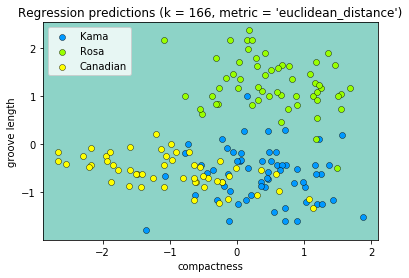

In [176]:
classifier = KNNClassifier(k=166)
classifier.fit(X_train, y_train)
fig, ax = plt.subplots()
plot_predictions(ax, X_train, y_train, classifier)

#### 12.  Imagine you had a new kernel that you did not know the classification of and it had a _scaled_ compactness of 2 and a _scaled_ groove_length of -.5.
Take a look at your three graphs.  What would the three different models predict for this data point?  Which do you think makes the most sense?


#### 13. Now lets look at some unseen data.  Call plot_predictions again, but this time pass in X_test and y_test instead of None.  Keep k at 5.  How well do you think your model did?  

/home/pkgalea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


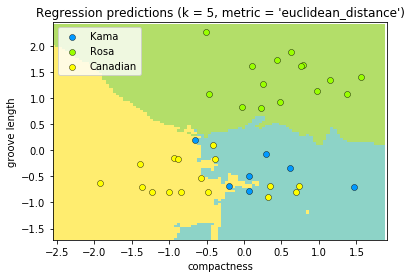

In [130]:
classifier = KNNClassifier(k=5)
classifier.fit(X_train, y_train)
fig, ax = plt.subplots()
plot_predictions(ax, X_train, y_train, classifier, X_test, y_test)

#### 14.  Now plot the unseen data with k=1.  When we were training the model we got all of our points correct?  Why is this no longer the case with unseen data? 

In [ ]:
classifier = KNNClassifier(k=1)
classifier.fit(X_train, y_train)
fig, ax = plt.subplots()
plot_predictions(ax, X_train, y_train, classifier, X_test, y_test, True)

#### 15. Write a function to compare the accuracy of a predicted set of y values to the actual set of y values.

In [73]:
def get_accuracy(pred_y, actual_y):
    correct = np.sum(pred_y == actual_y)
    return correct/pred_y.shape[0]


#### 16.  Loop over all possible values of k from 1 to 171 and instantiate a classifier with each value of k.    Don't use plot_predictions here, it will likely be too slow.
Use your accuracy function to pick the best possible k.   There'll be several answers.  Pick one and report your results.


"I chose a KNN model with k = ___ and my accuracy on unseen data was __________ "



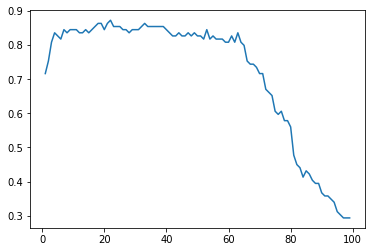

In [89]:
fig, ax = plt.subplots()
kv_list = []
for kv in range(1,100):
    classifier = KNNClassifier(k=kv)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    kv_list.append(get_accuracy (y_pred, y_test))

ax.plot(range(1,100), kv_list)


## Scale up

####  Import the dataset again, but this time don't drop any columns.  We now have 7 features instead of 2. 

In [90]:
y = df["wheat_type"]
X = df.loc[:,["compactness", "groove_length", "area", "perimeter", "kernel_length", "kernel_width", "asymmetry"]]
#X = np.array(df.drop("wheat_type", axis=1))

X_train = np.array(X.loc[:170])
X_test = np.array(X.loc[170:])
y_train = np.array(y.loc[:170])
y_test = np.array(y.loc[170:])


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### In part 1, we made a nice clear 2-d plot of compactness vs. groove_length and you were probably able to come up with a quick rule of thumb.  We're in 7 dimensions now so you won't be able to graph things or come up with any easy rule of thumbs. 

Use seaborn's pair plot to get look at how all fields interact with eachother to get some insight.

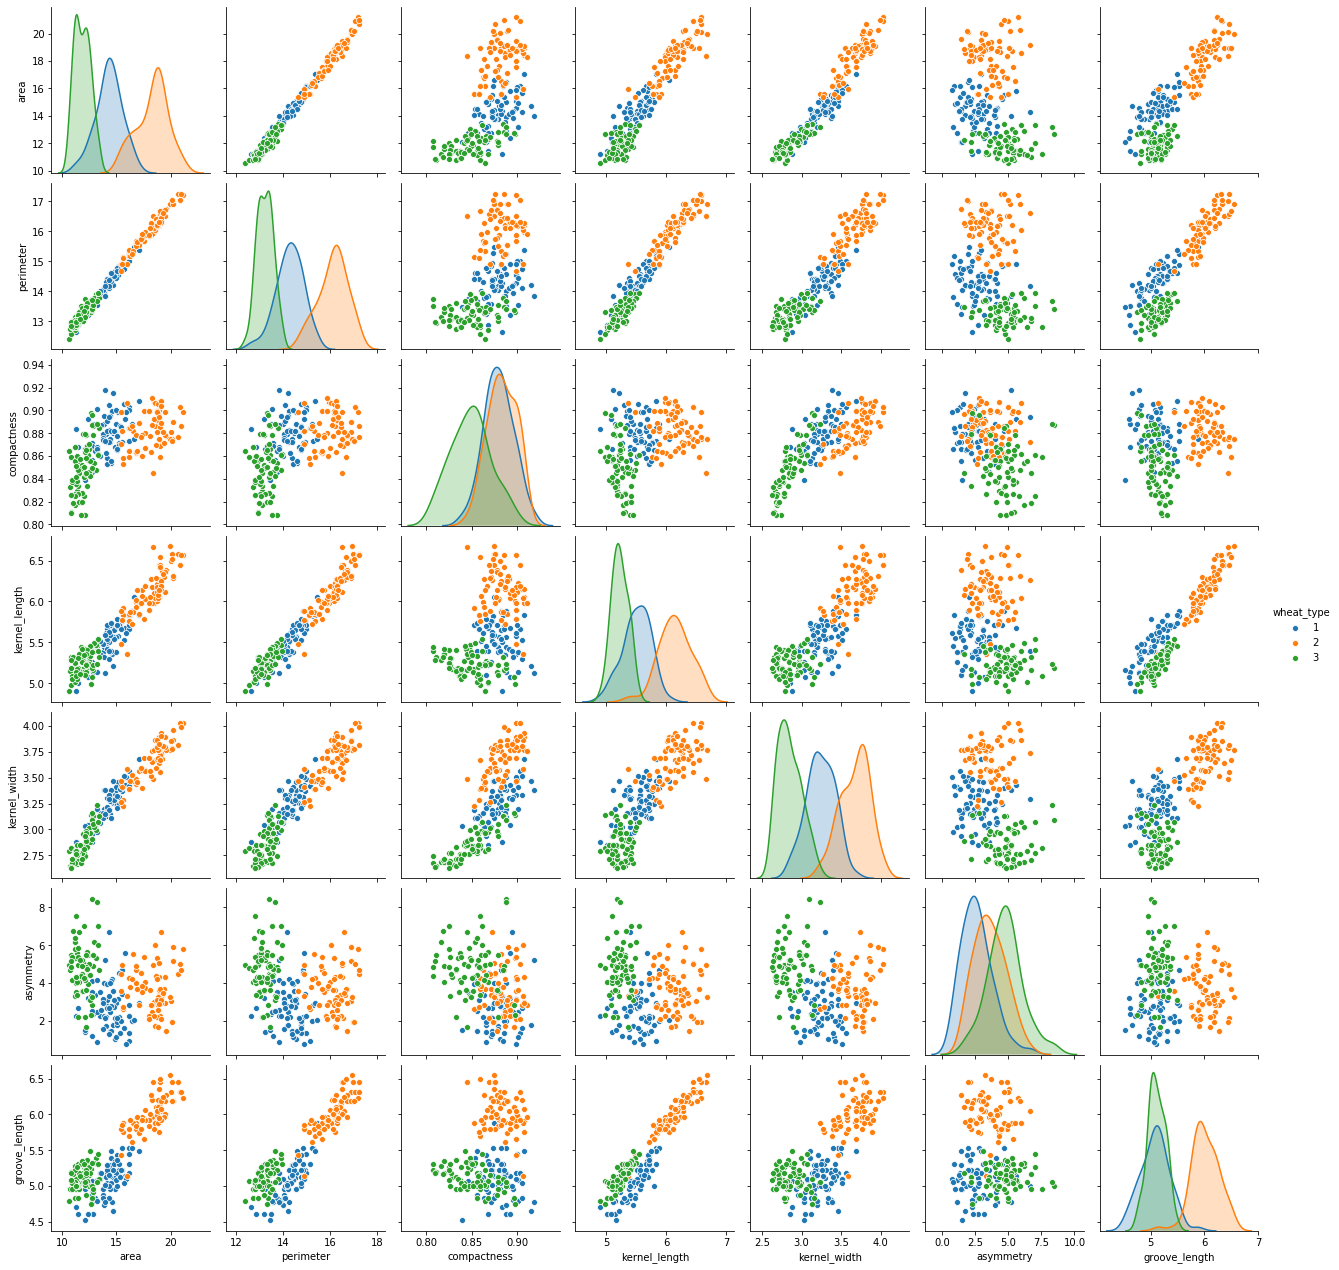

In [91]:
sns.pairplot(df, hue="wheat_type")

#### Run your accuracy loop from question 15 on the fully scaled data and pick a k that gives you  the best possible accuracy.
Do more features improve your results?

Report your results:

"I chose a KNN model with a k of ____ and my accuracy is _______"

In [92]:

for kv in range(1,171):
    classifier = KNNClassifier(k=kv)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(kv, get_accuracy (y_pred, y_test))

1 0.9541284403669725
2 0.9357798165137615
3 0.944954128440367
4 0.9357798165137615
5 0.9357798165137615
6 0.944954128440367
7 0.944954128440367
8 0.944954128440367
9 0.9541284403669725
10 0.9357798165137615
11 0.944954128440367
12 0.9541284403669725
13 0.9541284403669725
14 0.944954128440367
15 0.9357798165137615
16 0.9357798165137615
17 0.9174311926605505
18 0.908256880733945
19 0.9174311926605505
20 0.908256880733945
21 0.9174311926605505
22 0.9174311926605505
23 0.9174311926605505
24 0.9174311926605505
25 0.9174311926605505
26 0.926605504587156
27 0.926605504587156
28 0.908256880733945
29 0.908256880733945
30 0.908256880733945
31 0.908256880733945
32 0.908256880733945
33 0.908256880733945
34 0.908256880733945
35 0.908256880733945
36 0.9174311926605505
37 0.9174311926605505
38 0.908256880733945
39 0.908256880733945
40 0.8990825688073395
41 0.8990825688073395
42 0.8990825688073395
43 0.8990825688073395
44 0.8990825688073395
45 0.908256880733945
46 0.926605504587156
47 0.90825688073394

In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup
driver = webdriver.Chrome()

In [ ]:
driver.get("https://www.wunderground.com/calendar/us/az/phoenix/KPHX/date/2010-1")

In [ ]:
driver.page_source

In [ ]:
 soup = BeautifulSoup(driver.page_source, 'html.parser')

In [ ]:
<li _ngcontent-app-root-c216="" class="calendar-day current-month history ng-star-inserted"><div _ngcontent-app-root-c216="" class="date ng-star-inserted">13</div><!----><div _ngcontent-app-root-c216="" class="date-fill ng-star-inserted"></div><img _ngcontent-app-root-c216="" alt="icon" class="icon ng-star-inserted" src="//www.wunderground.com/static/i/c/v4/30.svg"><!----><div _ngcontent-app-root-c216="" class="phrase ng-star-inserted">partly cloudy</div><div _ngcontent-app-root-c216="" class="key ng-star-inserted">Actual:</div><!----><!----><!----><!----><!----><div _ngcontent-app-root-c216="" class="temperature ng-star-inserted"><span _ngcontent-app-root-c216="" class="hi">71°</span><span _ngcontent-app-root-c216="" class="delimiter"> | </span><span _ngcontent-app-root-c216="" class="low">54°</span></div><div _ngcontent-app-root-c216="" class="precipitation ng-star-inserted"><span _ngcontent-app-root-c216="" class="rain"></span><lib-display-unit _ngcontent-app-root-c216="" type="rain" _nghost-app-root-c122=""><span _ngcontent-app-root-c122="" class="test-false wu-unit wu-unit-rain ng-star-inserted"><!----><!----><!----><span _ngcontent-app-root-c122="" class="wu-value wu-value-to">0</span>&nbsp;<span _ngcontent-app-root-c122="" class="wu-label"><span _ngcontent-app-root-c122="" class="ng-star-inserted">in</span><!----><!----></span><!----></span><!----><!----></lib-display-unit></div><!----><!----><!----><!----><!----><!----><!----><!----><!----><!----></li>

In [ ]:
for d in soup.findAll("div", {"li": "calendar-day current-month history ng-star-inserted"}):
    print(d)
for d in soup.findAll("div", {"class": "date ng-star-inserted"}):
    print (d.text)
for w in soup.findAll("div", {"class": "phrase ng-star-inserted"}):
    print(w.text)

In [ ]:
for d in days:
    print(d.find("div", {"class": "date ng-star-inserted"}).text)
    print(d.find("div", {"class": "phrase ng-star-inserted"}).text)

In [ ]:
def get_time(url):
    driver.get(url)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    timer = soup.find("span", {"class": "timer-count"})
    print(timer.text)

In [ ]:
get_time("https://www.nytimes.com/puzzles/acrostic/2014/02/09")
get_time("https://www.nytimes.com/puzzles/acrostic/2014/05/04")
get_time("https://www.nytimes.com/puzzles/acrostic/2014/06/15")

In [ ]:
print(List)

(values,counts) = np.unique(np.array(List),return_counts=True)
ind=np.argmax(counts)
print (values[ind] )

In [ ]:
df[df.area>19]["Walkscore"] = "Hi there"

In [ ]:
df["Walkscore"] = "None"

In [ ]:
df